In [ ]:
#pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sai-pavan-goud/Security-Threat-Identification-Using-Machine-Learning/main/MalwareDataSet.csv')

In [ ]:
df

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1
...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0
137440,40000,2,6,1,32768,1048576,8,67624,0
137441,59610,10,0,5,33088,1048576,5,22648,0
137442,51216,2,0,1,0,1048576,8,2216,0


In [ ]:
df.describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


###  Count Plot for the Target Variable

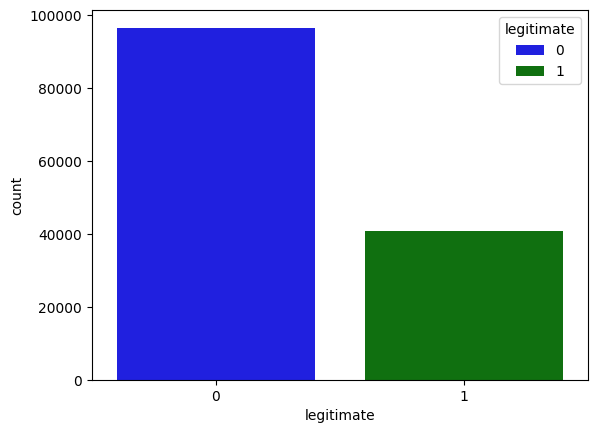

In [ ]:
sns.countplot(x='legitimate', hue='legitimate', data=df, palette={0: "blue", 1: "green"})
plt.show()

In [ ]:
#Taking a small sample from df for exploratory data analysis as dataset is huge
# df = df.sample(frac=0.3)

### Pairplot

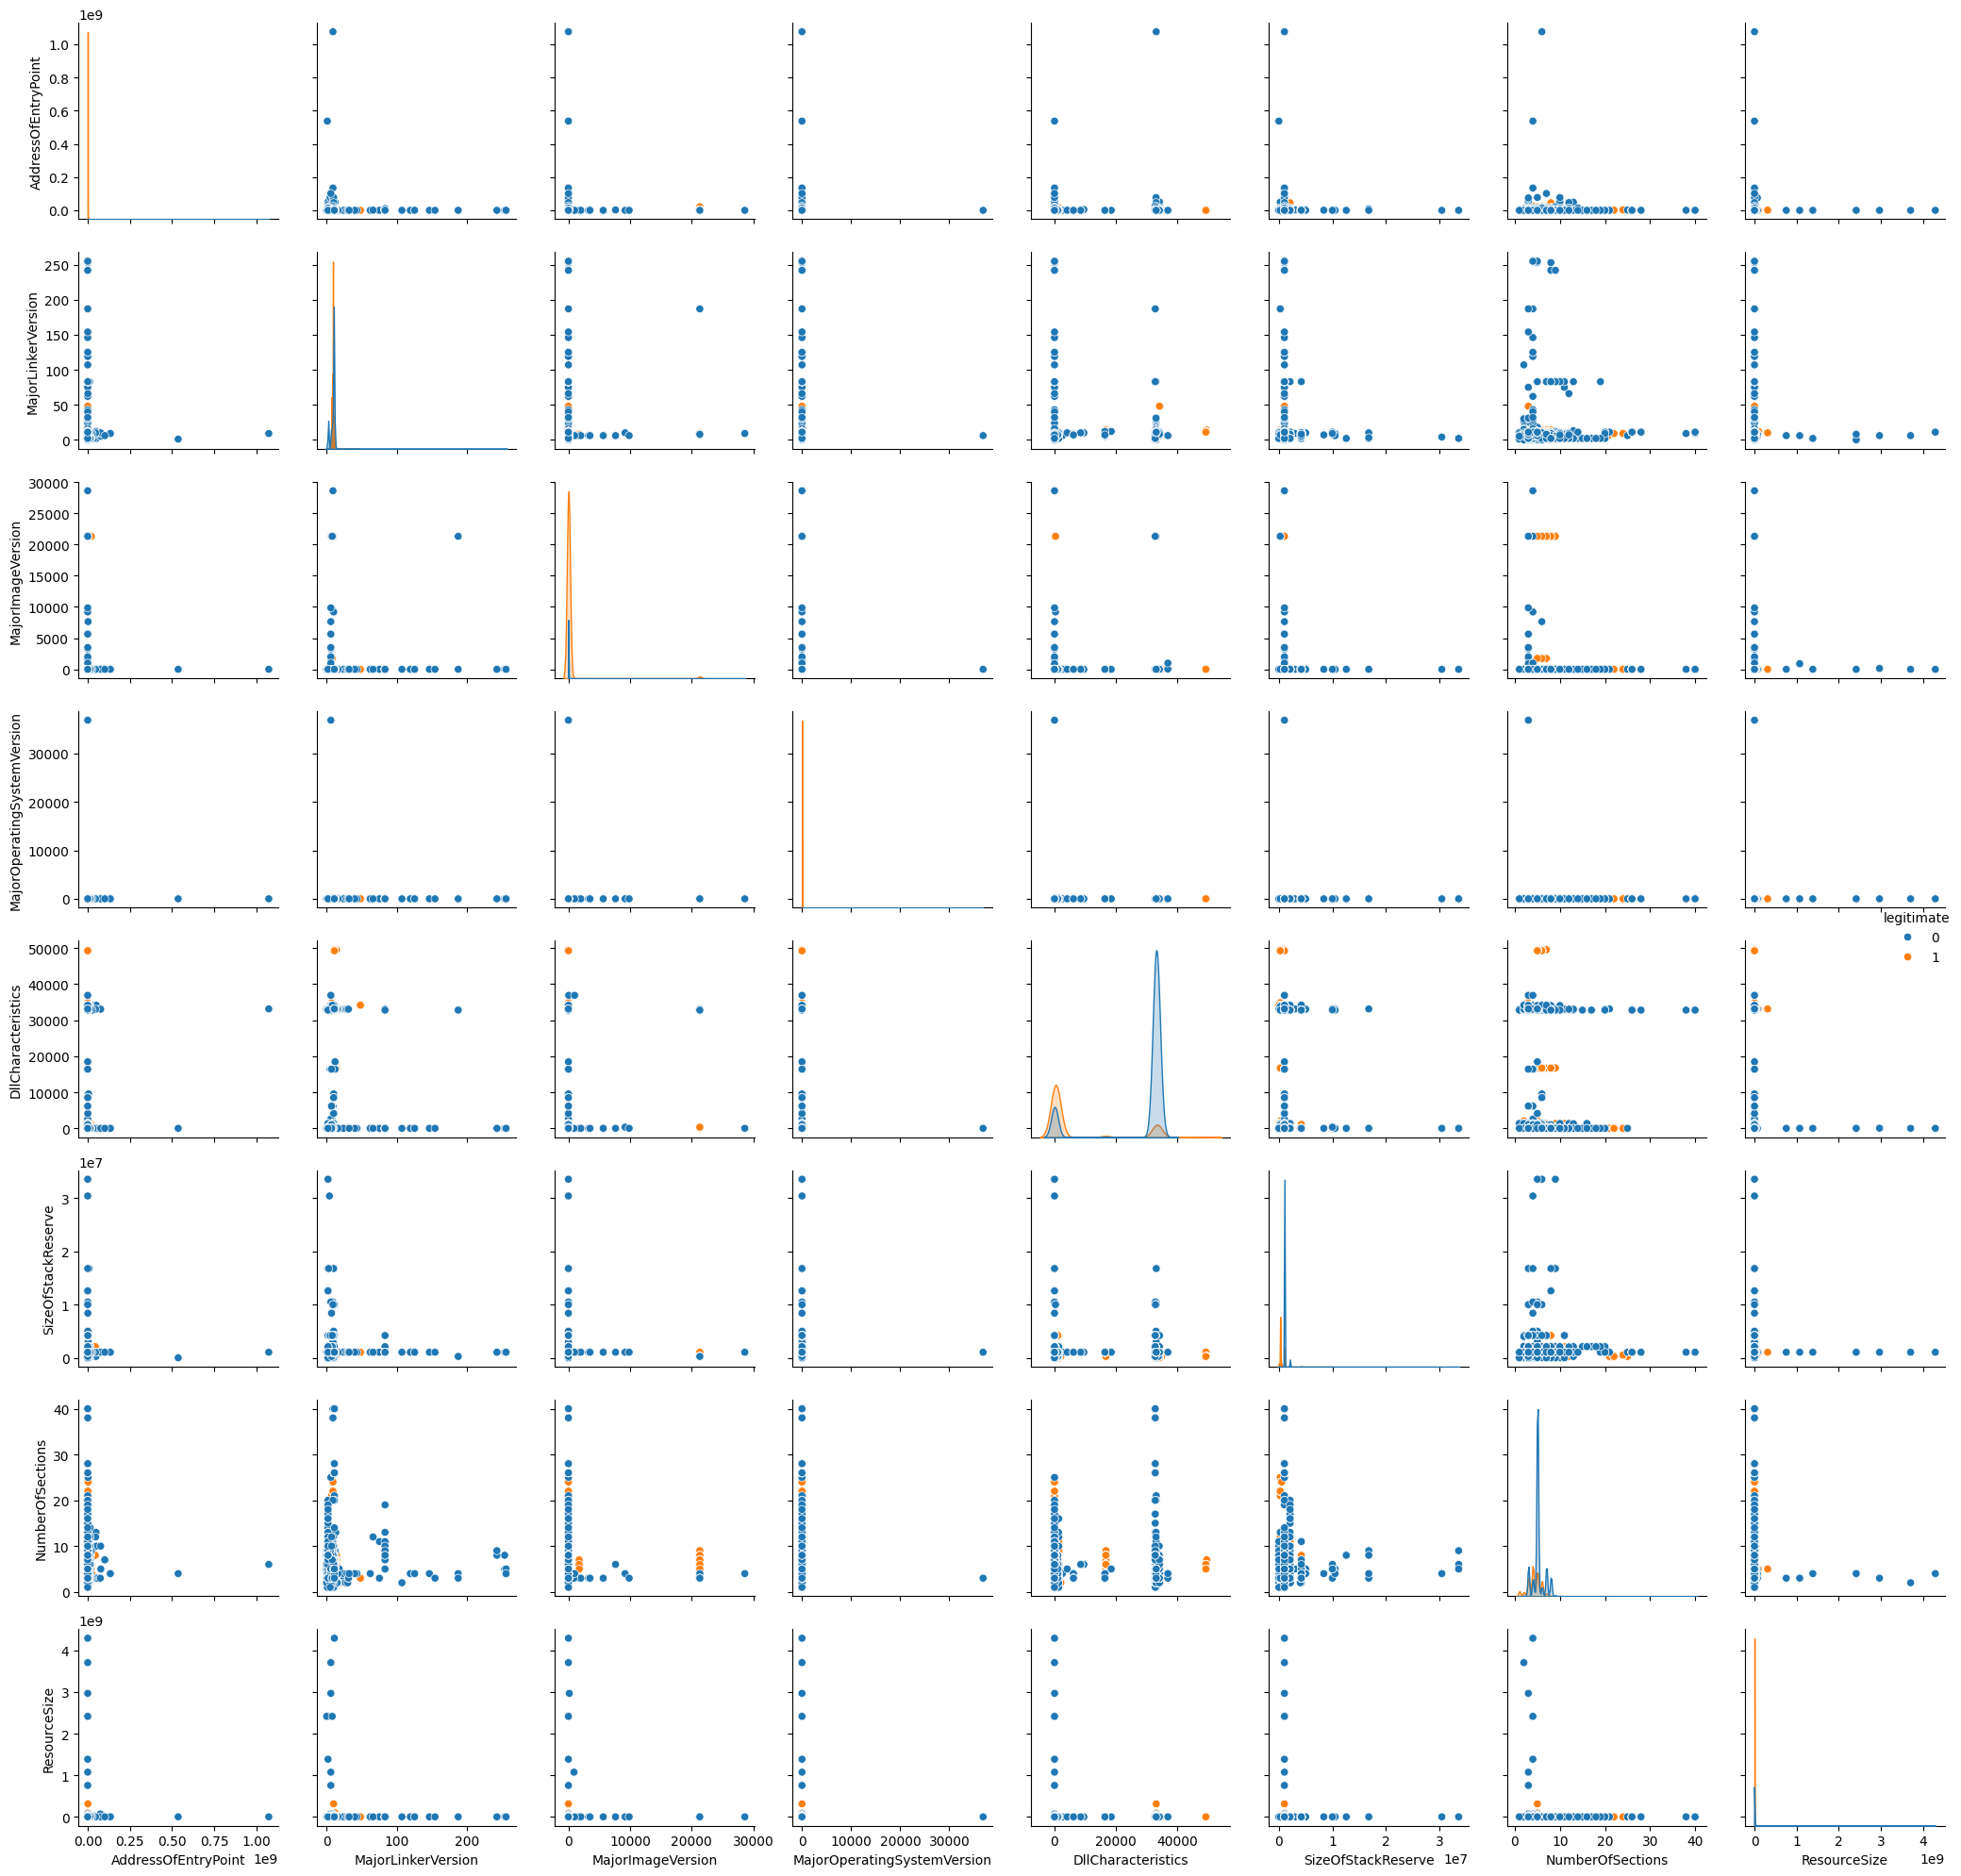

In [ ]:
sns.pairplot(df, hue='legitimate')
plt.tight_layout()
plt.show()

### Correlation Heatmap

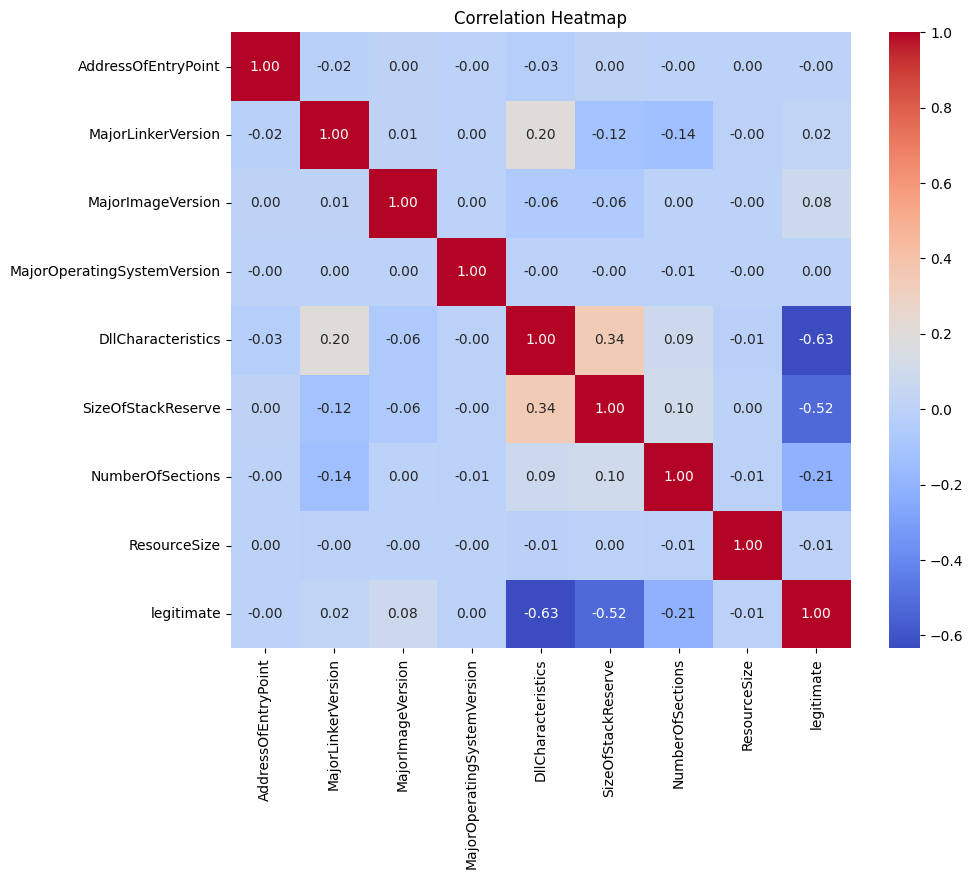

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Distribution of Each Feature

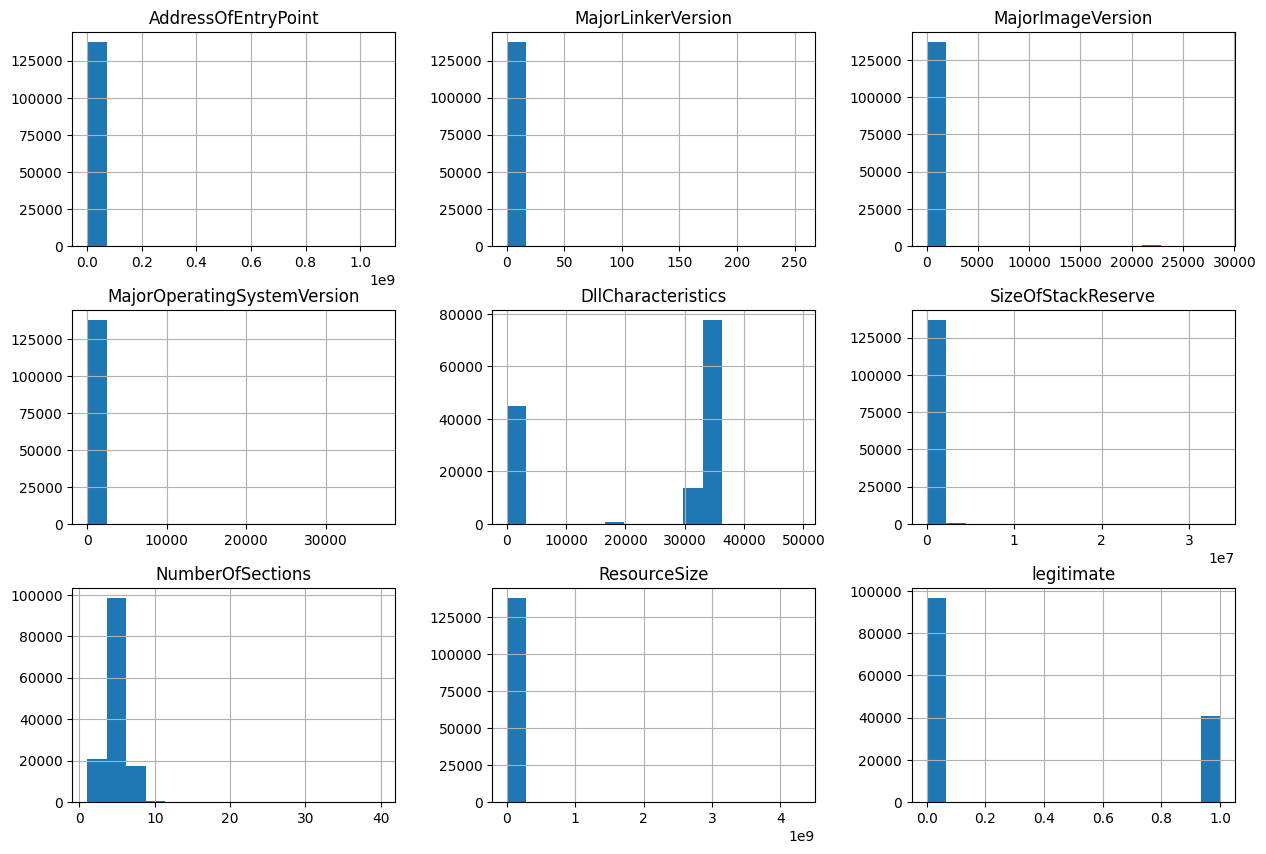

In [ ]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

### Box Plots for Numerical Data

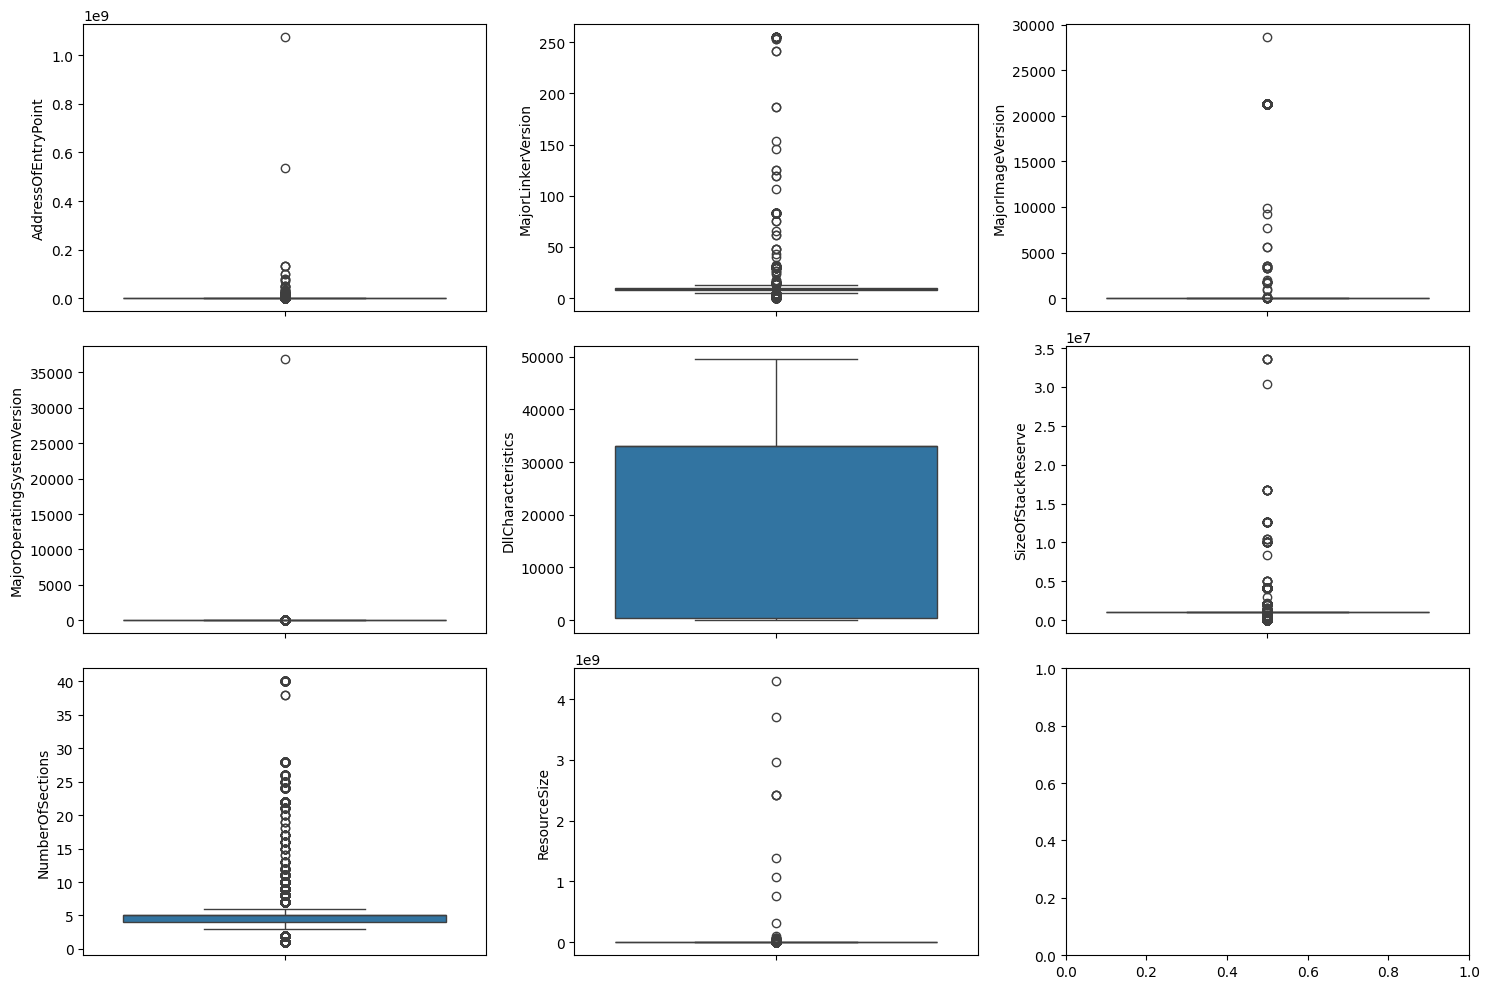

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Excluding 'legitimate' which is categorical
    sns.boxplot(y=df[column], ax=axs[i // 3, i % 3])
plt.tight_layout()
plt.show()

### Violin Plots

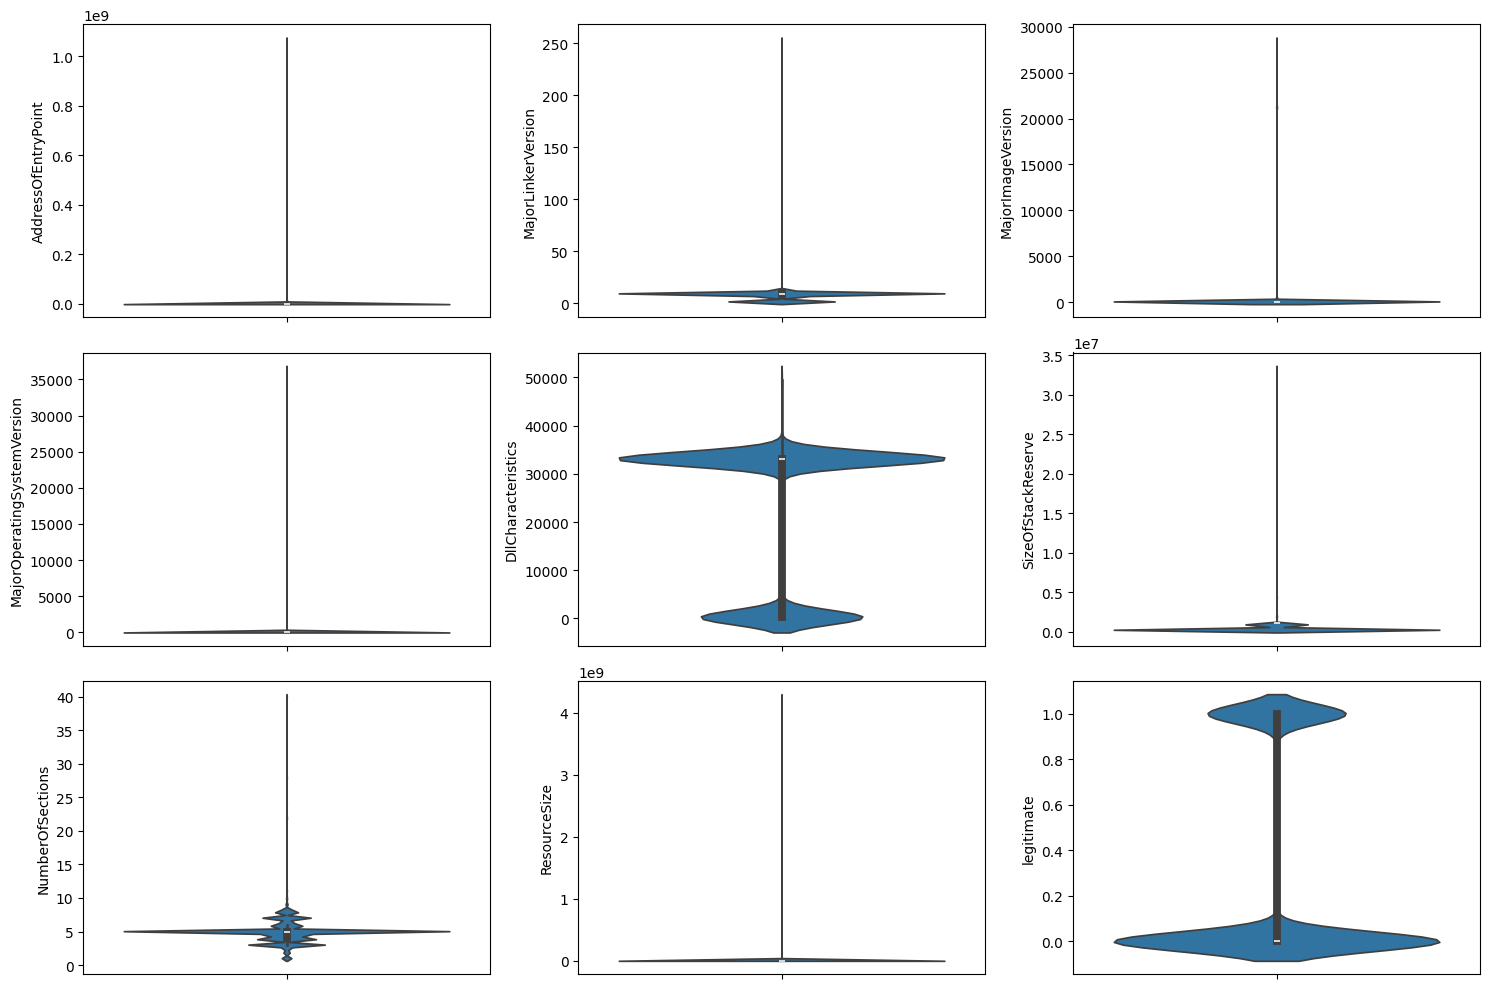

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    sns.violinplot(y=df[column], ax=axs[i // 3, i % 3])
plt.tight_layout()
plt.show()### Violin Plots

### KDE Plots

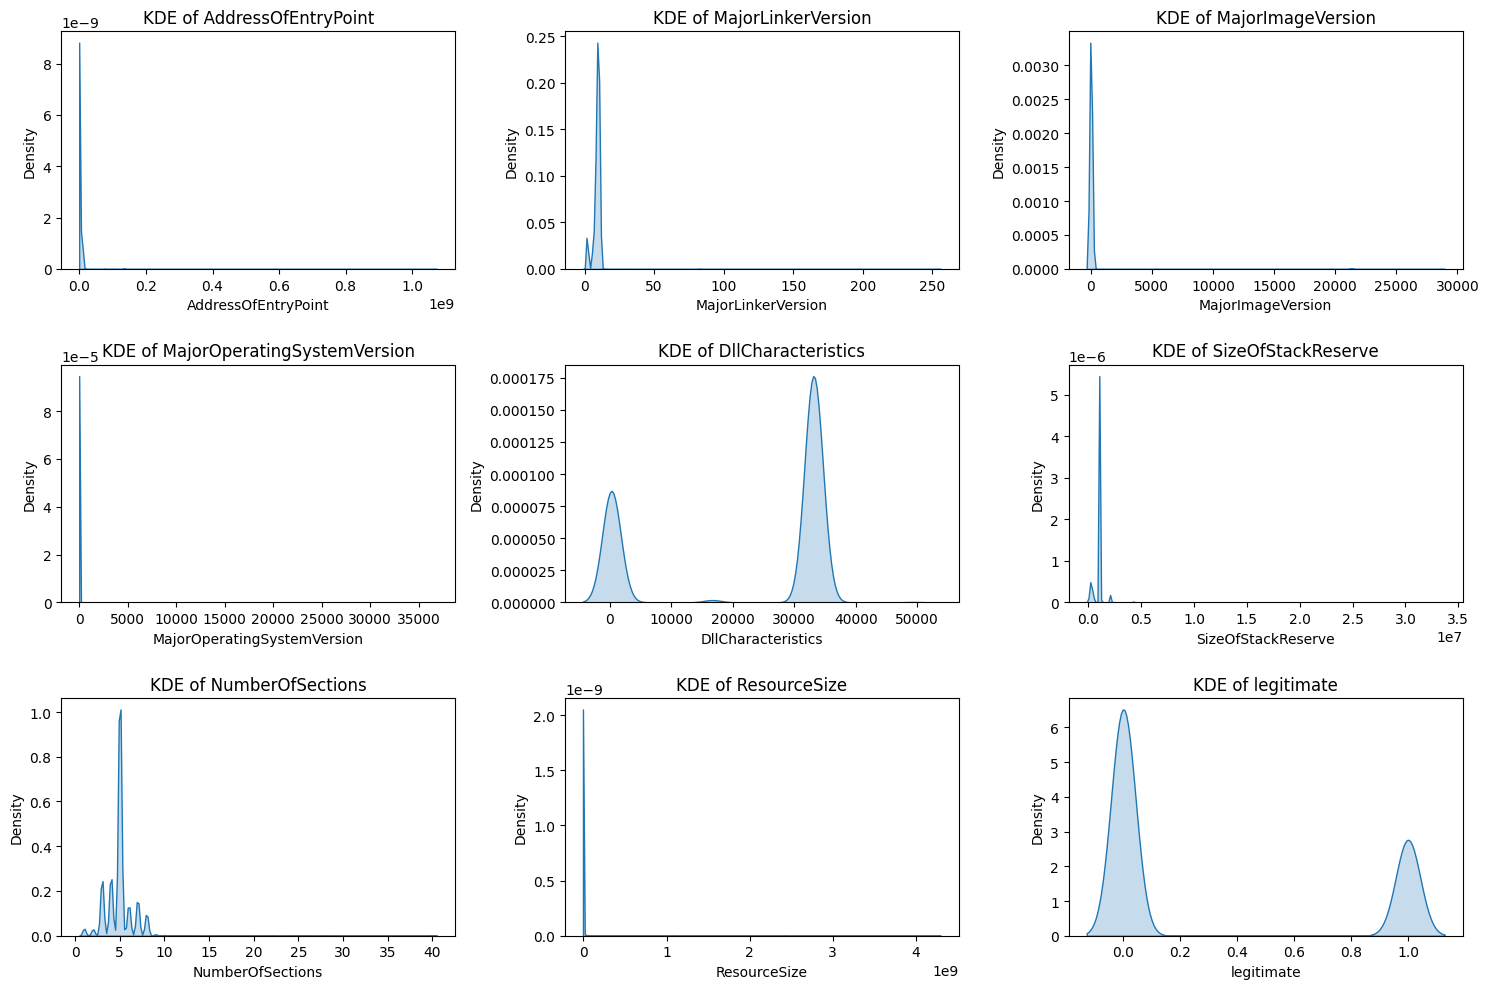

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    sns.kdeplot(df[column], fill=True, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'KDE of {column}')
plt.tight_layout()
plt.show()

### Further Correlation Analysis

In [ ]:
correlations = df.corr()['legitimate'].sort_values()
print(correlations)

DllCharacteristics            -0.633954
SizeOfStackReserve            -0.522306
NumberOfSections              -0.206382
ResourceSize                  -0.005513
AddressOfEntryPoint           -0.000070
MajorOperatingSystemVersion    0.002404
MajorLinkerVersion             0.017393
MajorImageVersion              0.084721
legitimate                     1.000000
Name: legitimate, dtype: float64


### Model

In [ ]:
# Split the data into features and target
X = df.drop('legitimate', axis=1)
y = df['legitimate']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Feature scaling and model definition using a pipeline that includes SMOTE
# smote = SMOTE(random_state=42)
downsampler = RandomUnderSampler()   #for class imbalance

In [ ]:
# Define pipeline with SMOTE and classifier for KNN
knn_pipe = ImbPipeline([
    # ('smote', smote),
    ('downsample', downsampler),
    ('knn', KNeighborsClassifier())
])

# Define pipeline for Decision Tree
dt_pipe = ImbPipeline([
    # ('smote', smote),
    ('downsample', downsampler),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define pipeline for Random Forest
rf_pipe = ImbPipeline([
    # ('smote', smote),
    ('downsample', downsampler),
    ('rf', RandomForestClassifier(random_state=42))
])

In [ ]:
# Define parameter grids
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


param_grid_dt = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

In [ ]:
# GridSearchCV setup for each model with corrected parameter grids
grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_dt = GridSearchCV(dt_pipe, param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

In [ ]:
# Fit models
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('downsample', RandomUnderSampler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': ['sqrt', 'log2', None],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Function to print accuracies and plot confusion matrix heatmap
def display_performance_and_plot_confusion_matrix(model, X_train, y_train, X_test, y_test, model_name):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Test Accuracy: {test_accuracy}")
    print(f"{model_name} Classification Report on Test Set:\n{classification_report(y_test, model.predict(X_test))}")

    # Plotting the confusion matrix as a heatmap
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Function to check feature importance
def plot_feature_importances(model, X_train, df, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances in {model_name}')
        plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
        plt.xticks(range(X_train.shape[1]), [df.columns[i] for i in indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.ylabel('Importance')
        plt.show()

In [ ]:
def plot_curves(model, X_test, y_test, model_name):
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), plot_macro=False)
    plt.title(f'ROC Curve - {model_name}')
    plt.show()

    skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test), plot_micro=False)
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

In [ ]:
# Evaluate models
evaluate_models = {
    'KNN': grid_knn.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    'Random Forest': grid_rf.best_estimator_
}

KNN Training Accuracy: 0.9918694011186394
KNN Test Accuracy: 0.9820655534941249
KNN Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19186
           1       0.95      0.99      0.97      8303

    accuracy                           0.98     27489
   macro avg       0.97      0.98      0.98     27489
weighted avg       0.98      0.98      0.98     27489



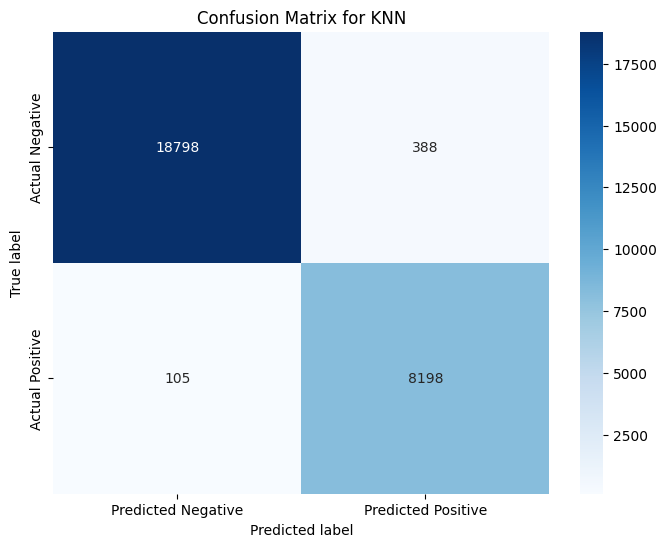

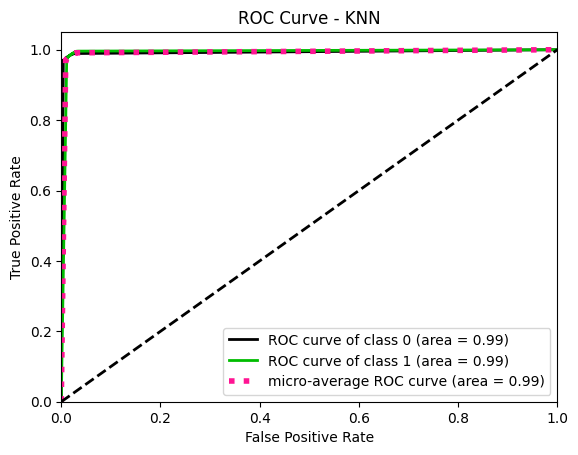

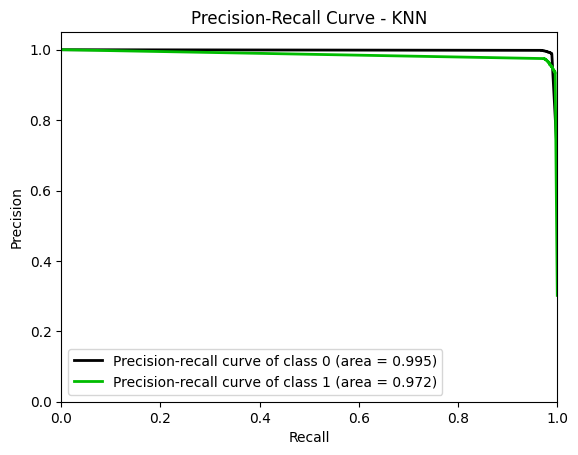

Decision Tree Training Accuracy: 0.9926970124141694
Decision Tree Test Accuracy: 0.9857033722579941
Decision Tree Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19186
           1       0.96      0.99      0.98      8303

    accuracy                           0.99     27489
   macro avg       0.98      0.99      0.98     27489
weighted avg       0.99      0.99      0.99     27489



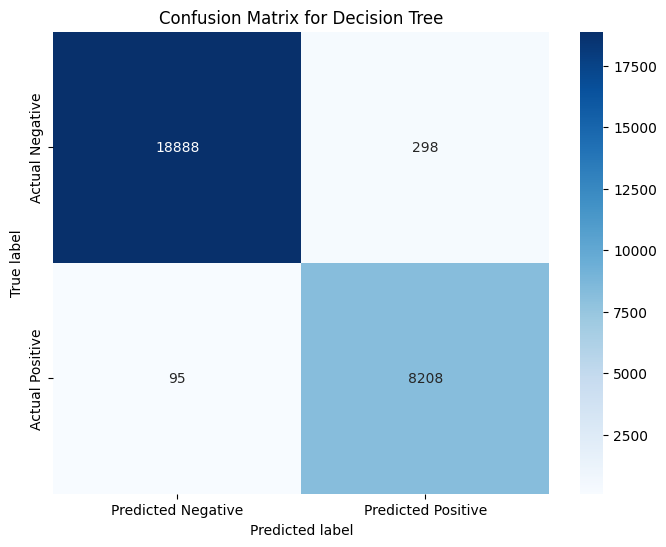

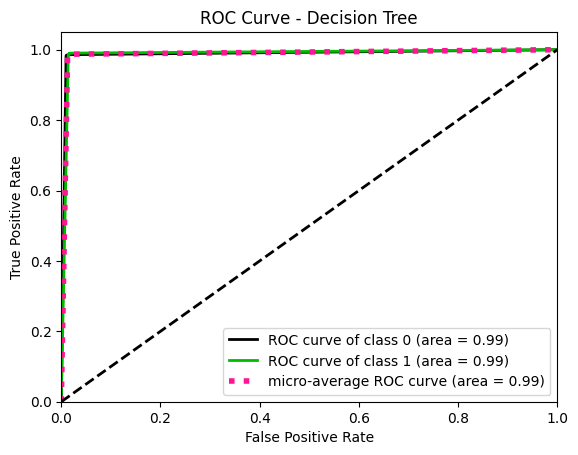

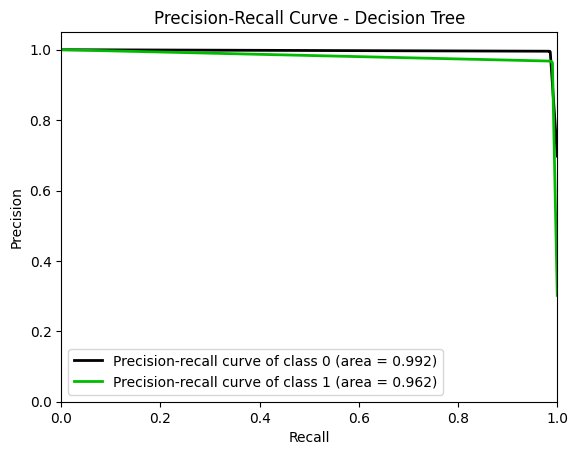

Random Forest Training Accuracy: 0.9943067618571234
Random Forest Test Accuracy: 0.9891229218960311
Random Forest Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19186
           1       0.97      0.99      0.98      8303

    accuracy                           0.99     27489
   macro avg       0.98      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



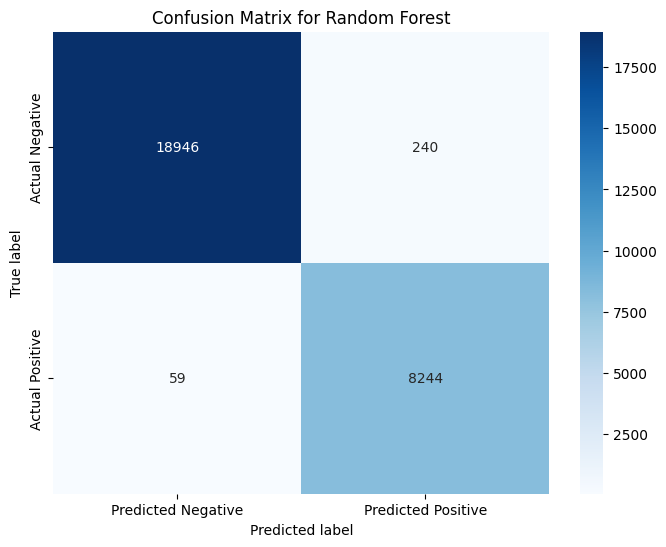

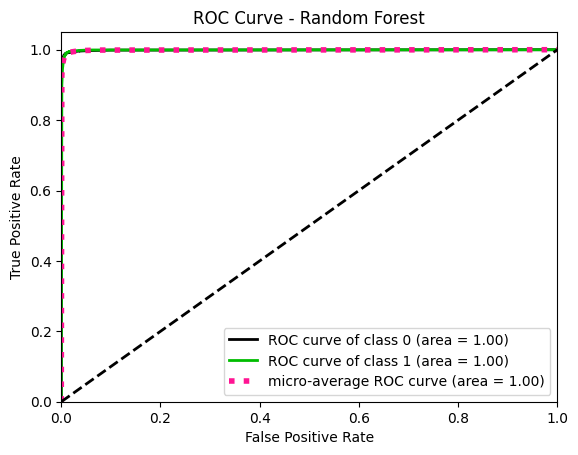

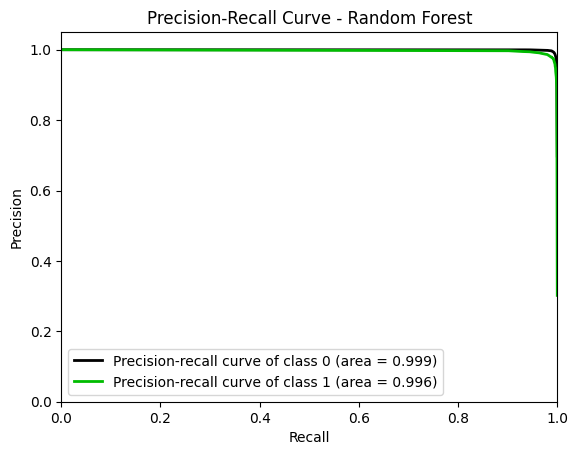

In [ ]:
for model_name, model in evaluate_models.items():
    display_performance_and_plot_confusion_matrix(model, X_train, y_train, X_test, y_test, model_name)
    plot_curves(model, X_test, y_test, model_name)
    if model_name in ['Decision Tree', 'Random Forest']:
        plot_feature_importances(model, X_train, df, model_name)